# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.


## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.


**Решение:** 

1. Минимизируемый функционал:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - w_{1}z_{i1} - w_{2}z_{i2}\|^2
$$
$$
\text{при условиях: } w_1^Tw_1 = 1, \quad w_2^Tw_2 = 1, \quad w_1^Tw_2 = 0.
$$

2. Новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.

$$
f_{i} = \|x_i - w_{1}z_{i1} - w_{2}z_{i2}\|^2 \to \min_{z_{i1}, z_{i2}}
$$
$$
f_{i} = (x_i - w_{1}z_{i1} - w_{2}z_{i2})^T(x_i - w_{1}z_{i1} - w_{2}z_{i2})
$$
$$
f_{i} = x_i^Tx_i - 2z_{i1}x_i^Tw_1 - 2z_{i2}x_i^Tw_2 + z_{i1}^2w_1^Tw_1 + z_{i2}^2w_2^Tw_2 + 2z_{i1}z_{i2}w_1^Tw_2
$$
$$
= x_i^Tx_i - 2z_{i1}x_i^Tw_1 - 2z_{i2}x_i^Tw_2 + z_{i1}^2 + z_{i2}^2
$$
$$
\frac{\partial f_{i}}{\partial z_{i1}} = -2x_i^Tw_1 + 2z_{i1} = 0 \Rightarrow z_{i1} = x_i^Tw_1
$$
$$
\frac{\partial f_{i}}{\partial z_{i2}} = -2x_i^Tw_2 + 2z_{i2} = 0 \Rightarrow z_{i2} = x_i^Tw_2
$$
Новые координаты - проекции исходных данных на соответствующие векторы $w_1$, $w_2$.

3. $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию.

Подставим найденные значения $z_{i1}$, $z_{i2}$ в функционал:
$$
L(W) = \sum\limits_{i = 1}^n \|x_i - w_{1}(x_i^Tw_1) - w_{2}(x_i^Tw_2)\|^2
$$
$$
= \sum\limits_{i = 1}^n \left( x_i^Tx_i - (x_i^Tw_1)^2 - (x_i^Tw_2)^2 \right)
$$
$$
= \sum\limits_{i = 1}^n x_i^Tx_i - w_1^T \left( \sum\limits_{i = 1}^n x_ix_i^T \right) w_1 - w_2^T \left( \sum\limits_{i = 1}^n x_ix_i^T \right) w_2
$$
$$
= \sum\limits_{i = 1}^n (x_i^Tx_i - n w_1^T C w_1 - n w_2^T C w_2)
$$
$$
= \sum\limits_{i = 1}^n x_i^Tx_i - n \left( w_1^T C w_1 + w_2^T C w_2 \right)
$$
$$
min \ L(W) \Leftrightarrow max \ (w_1^T C w_1 + w_2^T C w_2)
$$
При этом условия на $w_1$, $w_2$ остаются прежними.
Построим функцию Лагранжа:
$$
\mathcal{L}(w_1, w_2, \lambda_1, \lambda_2, \lambda_3) = w_1^T C w_1 + w_2^T C w_2 - \lambda_1 (w_1^Tw_1 - 1) - \lambda_2 (w_2^Tw_2 - 1) - \lambda_3 (w_1^Tw_2)
$$
$$
\frac{\partial \mathcal{L}}{\partial w_1} = 2 C w_1 - 2 \lambda_1 w_1 - \lambda_3 w_2 = 0
$$
$$
\frac{\partial \mathcal{L}}{\partial w_2} = 2 C w_2 - 2 \lambda_2 w_2 - \lambda_3 w_1 = 0
$$
Умножим первое уравнение скалярно на $w_2^T$, а второе на $w_1^T$:
$$
w_2^T \frac{\partial \mathcal{L}}{\partial w_1} = 2 w_2^T C w_1 - 2 \lambda_1 w_2^T w_1 - \lambda_3 w_2^T w_2 = 0
$$
$$
w_1^T \frac{\partial \mathcal{L}}{\partial w_2} = 2 w_1^T C w_2 - 2 \lambda_2 w_1^T w_2 - \lambda_3 w_1^T w_1 = 0
$$
$$
\Rightarrow - \lambda_3 = 0 \Rightarrow \lambda_3 = 0
$$
Подставим $\lambda_3 = 0$ обратно в уравнения:
$$
2 C w_1 - 2 \lambda_1 w_1 = 0 \Rightarrow C w_1 = \lambda_1 w_1
$$
$$
2 C w_2 - 2 \lambda_2 w_2 = 0 \Rightarrow C w_2 = \lambda_2 w_2
$$
Таким образом, $w_1$, $w_2$ — собственные векторы выборочной ковариационной матрицы $C$, отвечающие собственным значениям $\lambda_1$, $\lambda_2$.


## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.


**Решение:** 

1. Существует ортогональная матрица $U$:

$$
X = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{pmatrix}
$$
$$
XX^T = \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 2
\end{pmatrix}
$$
Собственные значения матрицы $XX^T$:
$$
\lambda_1 = \frac{3 + \sqrt{5}}{2},
\quad \lambda_2 = 1,
\quad \lambda_3 = \frac{3 - \sqrt{5}}{2}
$$
Собственные векторы матрицы $XX^T$:
$$
u_1 = \begin{pmatrix}
\frac{-1 + \sqrt{5}}{2} \\
0 \\
1 \end{pmatrix},
$$
$$
u_2 = \begin{pmatrix}
0 \\
1 \\
0 \end{pmatrix},
$$
$$
u_3 = \begin{pmatrix}
\frac{-1 - \sqrt{5}}{2} \\
0 \\
1 \end{pmatrix}
$$

Построим матрицу $U$ из собственных векторов:
$$
U = \begin{pmatrix}
\frac{-1 + \sqrt{5}}{2} & 0 & \frac{-1 - \sqrt{5}}{2} \\
0 & 1 & 0 \\
1 & 0 & 1
\end{pmatrix}
$$

Тогда
$$
U^TXX^TU = \begin{pmatrix}
\frac{3 + \sqrt{5}}{2} & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & \frac{3 - \sqrt{5}}{2}
\end{pmatrix} = \Lambda
$$

2. Верно равенство:

$$
U^TXX^TU = \Lambda
$$
Умножим слева на $U$ $(UU^T = I)$:
$$
XX^TU = U \Lambda
$$
Умножим слева на $X^T$:
$$
X^TXX^TU = X^TU \Lambda
$$
$$
(X^TX)(X^TU) = X^TU \Lambda
$$
Таким образом, $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Столбцы матрицы $X^TU$ ортогональны, но не ортонормированы:

$$
X^TU = \begin{pmatrix}
\frac{-1 + \sqrt{5}}{2} & 0 & \frac{-1 - \sqrt{5}}{2} \\
0 & 1 & 0 \\
\frac{1 + \sqrt{5}}{2} & 0 & \frac{1 - \sqrt{5}}{2}
\end{pmatrix}
$$
Проверим ортогональность столбцов:
$$
\begin{pmatrix}
\frac{-1 + \sqrt{5}}{2} \\
0 \\
\frac{1 + \sqrt{5}}{2}
\end{pmatrix}^T
\begin{pmatrix}
\frac{-1 - \sqrt{5}}{2} \\
0 \\
\frac{1 - \sqrt{5}}{2}
\end{pmatrix} = 0
$$
$$
\begin{pmatrix}
\frac{-1 + \sqrt{5}}{2} \\
0 \\
\frac{1 + \sqrt{5}}{2}
\end{pmatrix}^T
\begin{pmatrix}
0 \\
1 \\
0
\end{pmatrix} = 0
$$
$$
\begin{pmatrix}
\frac{-1 - \sqrt{5}}{2} \\
0 \\
\frac{1 - \sqrt{5}}{2}
\end{pmatrix}^T
\begin{pmatrix}
0 \\
1 \\
0
\end{pmatrix} = 0
$$
Проверим нормы столбцов:
$$
\left\| \begin{pmatrix}
\frac{-1 + \sqrt{5}}{2} \\
0 \\
\frac{1 + \sqrt{5}}{2}
\end{pmatrix} \right\| = \sqrt{\left( \frac{-1 + \sqrt{5}}{2} \right)^2 + 0^2 + \left( \frac{1 + \sqrt{5}}{2} \right)^2} = \sqrt{\frac{(-1 + \sqrt{5})^2 + (1 + \sqrt{5})^2}{4}} = \sqrt{\frac{6 + 2\sqrt{5}}{4}} = \sqrt{\frac{3 + \sqrt{5}}{2}}
$$
$$
\left\| \begin{pmatrix}
0 \\
1 \\
0
\end{pmatrix} \right\| = 1
$$
$$
\left\| \begin{pmatrix}
\frac{-1 - \sqrt{5}}{2} \\
0 \\
\frac{1 - \sqrt{5}}{2}
\end{pmatrix} \right\| = \sqrt{\left( \frac{-1 - \sqrt{5}}{2} \right)^2 + 0^2 + \left( \frac{1 - \sqrt{5}}{2} \right)^2} = \sqrt{\frac{(-1 - \sqrt{5})^2 + (1 - \sqrt{5})^2}{4}} = \sqrt{\frac{6 - 2\sqrt{5}}{4}} = \sqrt{\frac{3 - \sqrt{5}}{2}}
$$

4. Найдем нормы столбцов $X^TU$, приведем преобразование к ортогональному:

Нормы столбцов найдены в пункте 3. Приведем к ортонормированному виду, поделив каждый столбец на его норму:
$$
Q = \begin{pmatrix}
\frac{\frac{-1 + \sqrt{5}}{2}}{\sqrt{\frac{3 + \sqrt{5}}{2}}} & 0 & \frac{\frac{-1 - \sqrt{5}}{2}}{\sqrt{\frac{3 - \sqrt{5}}{2}}} \\
0 & 1 & 0 \\
\frac{\frac{1 + \sqrt{5}}{2}}{\sqrt{\frac{3 + \sqrt{5}}{2}}} & 0 & \frac{\frac{1 - \sqrt{5}}{2}}{\sqrt{\frac{3 - \sqrt{5}}{2}}}
\end{pmatrix}
$$

5. Проверим численно с использованием numpy:

In [4]:
import numpy as np

X = np.array([[1, 0, 0],
                [0, 1, 0],
                [1, 0, 1]])
XXT = X @ X.T
eigenvalues, eigenvectors = np.linalg.eig(XXT)
U = eigenvectors
Lambda = np.diag(eigenvalues)
result = U.T @ XXT @ U
print("U^T * XX^T * U:")
print(result)

U^T * XX^T * U:
[[3.81966011e-01 1.66533454e-16 0.00000000e+00]
 [0.00000000e+00 2.61803399e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [3]:
# Проверка ортогональности столбцов X^TU
XTU = X.T @ U
dot_products = XTU.T @ XTU
print("Скалярные произведения столбцов X^TU:")
print(dot_products)

Скалярные произведения столбцов X^TU:
[[3.81966011e-01 1.78660676e-16 0.00000000e+00]
 [1.78660676e-16 2.61803399e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [5]:
# Проверка не ортонормированности столбцов X^TU
norms = np.linalg.norm(XTU, axis=0)
print("Нормы столбцов X^TU:")
print(norms)

Нормы столбцов X^TU:
[0.61803399 1.61803399 1.        ]


In [6]:
# Приведение к ортонормированному виду
Q = XTU / norms
print("Ортонормированная матрица Q:")
print(Q)

Ортонормированная матрица Q:
[[-0.52573111 -0.85065081  0.        ]
 [ 0.          0.          1.        ]
 [ 0.85065081 -0.52573111  0.        ]]


In [7]:
# Проверка ортонормированности матрицы Q
Q_dot = Q.T @ Q
print("Скалярные произведения столбцов матрицы Q:")
print(Q_dot)

Скалярные произведения столбцов матрицы Q:
[[1.00000000e+00 2.53609645e-16 0.00000000e+00]
 [2.53609645e-16 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [8]:
# Нормы столбцов матрицы Q
Q_norms = np.linalg.norm(Q, axis=0)
print("Нормы столбцов матрицы Q:")
print(Q_norms)

Нормы столбцов матрицы Q:
[1. 1. 1.]



## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

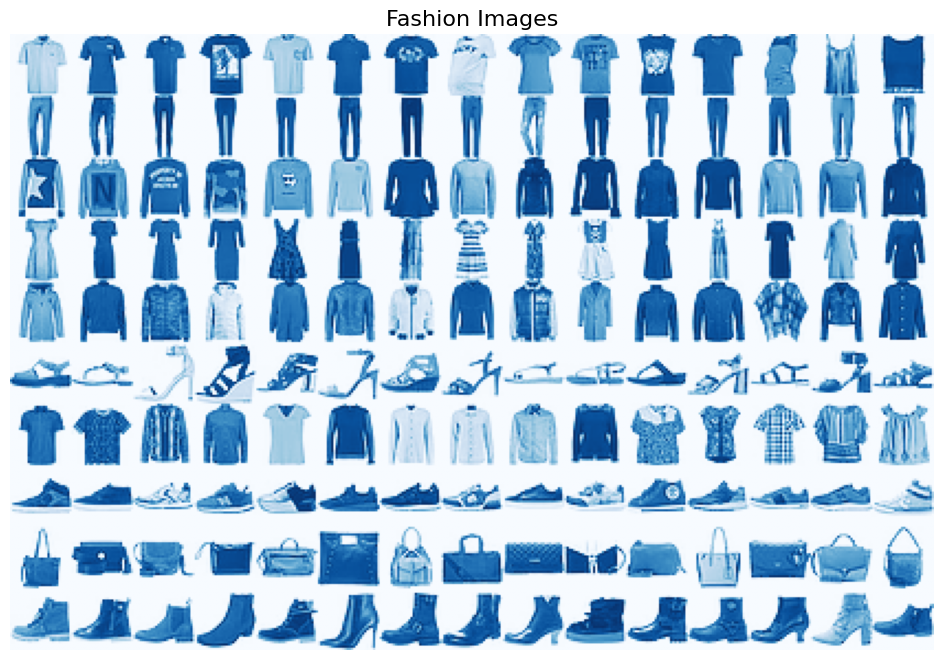

In [13]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [14]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=2000, tol=0.001, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1}")

F1 Score (weighted): 0.7488561432754796


C:\Users\aster\PycharmProjects\itmo-stats\venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:**

`f1_score` - гармоническое среднее между точностью (precision) и полнотой (recall). F1-score необходим, когда оба этих показателя важны.
Плюсы:
- Баланс между точностью и полнотой
Минусы:
- Не учитывает true negatives

Параметр `average='weighted'` вычисляет F1-score для каждого класса и усредняет их, взвешивая по количеству истинных экземпляров каждого класса.
Другие параметры:
- `average='micro'`: учитывает общие true positives, false negatives и false positives
- `average='macro'`: усредняет F1-score по классам без учета частоты
- `average='samples'`: усредняет F1-score по сэмплам (для задач мультиклассовой классификации)
- `average=None`: возвращает F1-score для каждого класса отдельно

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

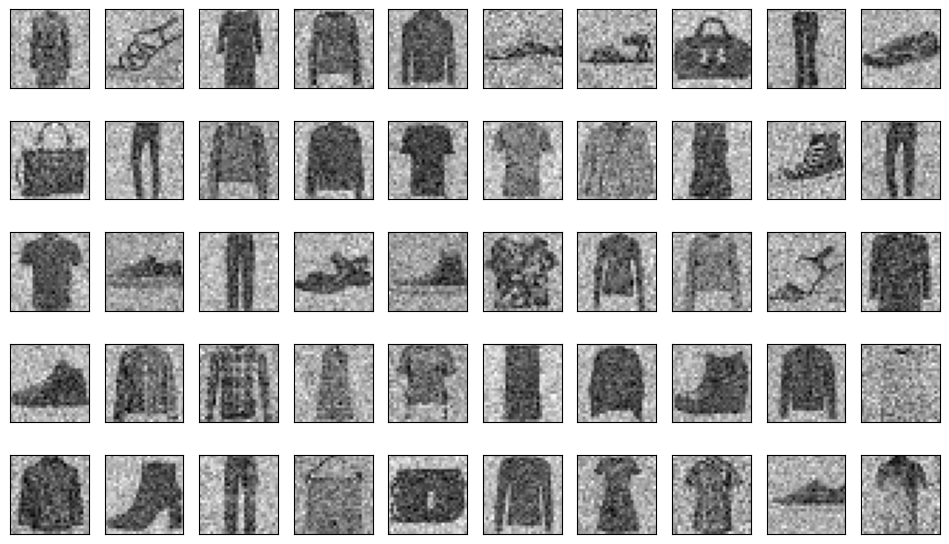

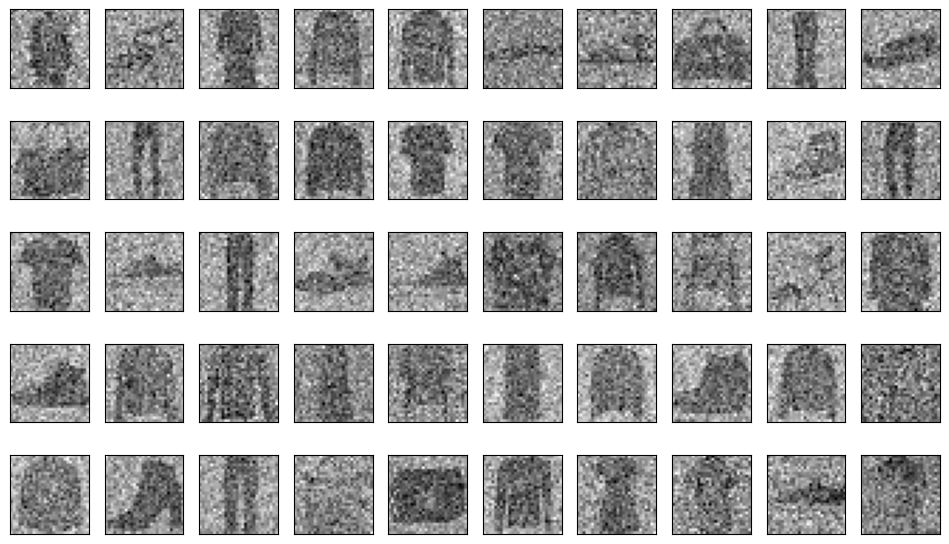

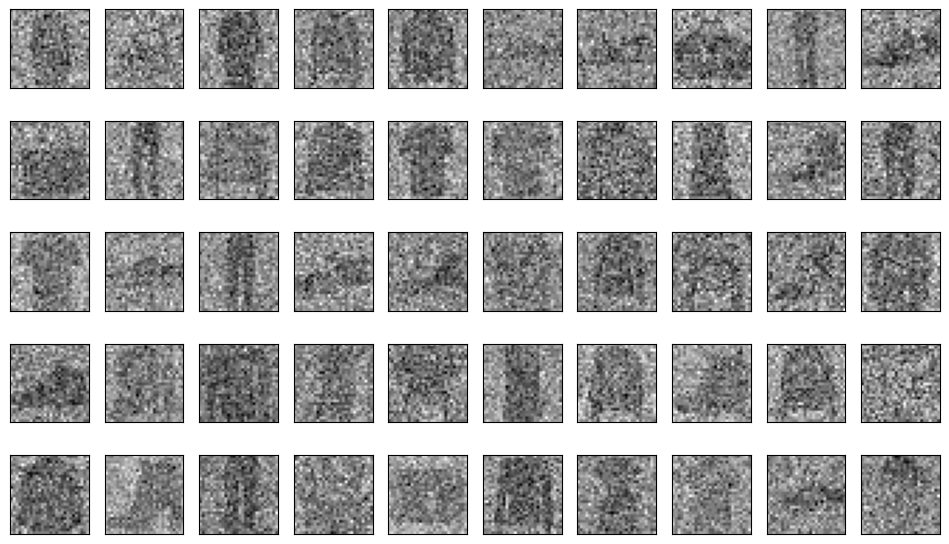

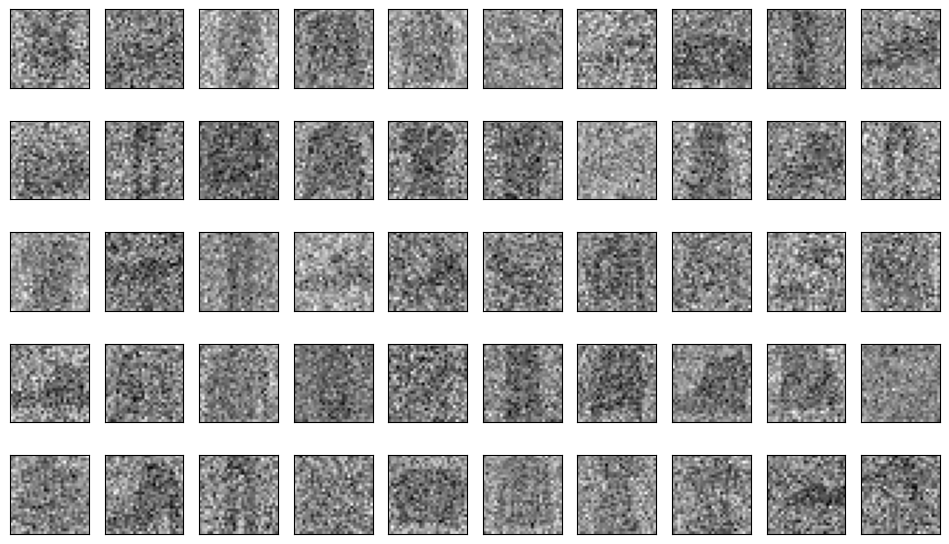

In [22]:
for scale in [50, 100, 150, 200]:
    X_test_noisy = np.random.normal(X_test, scale=scale)
    
    fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:**

При увеличении степени зашумленности изображений они становятся менее различимыми и теряют свои характерные черты, необходимые для классификации. На высоком уровне шума (scale=200) изображения становятся неразличимыми даже для человека. 

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [23]:
for scale in [50, 100, 150, 200]:
    X_test_noisy = np.random.normal(X_test, scale=scale)
    y_pred_noisy = model.predict(X_test_noisy)
    f1_noisy = f1_score(y_test, y_pred_noisy, average='weighted')
    print(f"Scale: {scale}, F1 Score (weighted): {f1_noisy}")

Scale: 50, F1 Score (weighted): 0.5283039404353463
Scale: 100, F1 Score (weighted): 0.3522166051482006
Scale: 150, F1 Score (weighted): 0.27717977514744657
Scale: 200, F1 Score (weighted): 0.20043118434246157


**Ваши выводы:**

Если модель обучалась на чистых данных, то при увеличении уровня шума в тестовых данных качество классификации значительно ухудшается. 

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

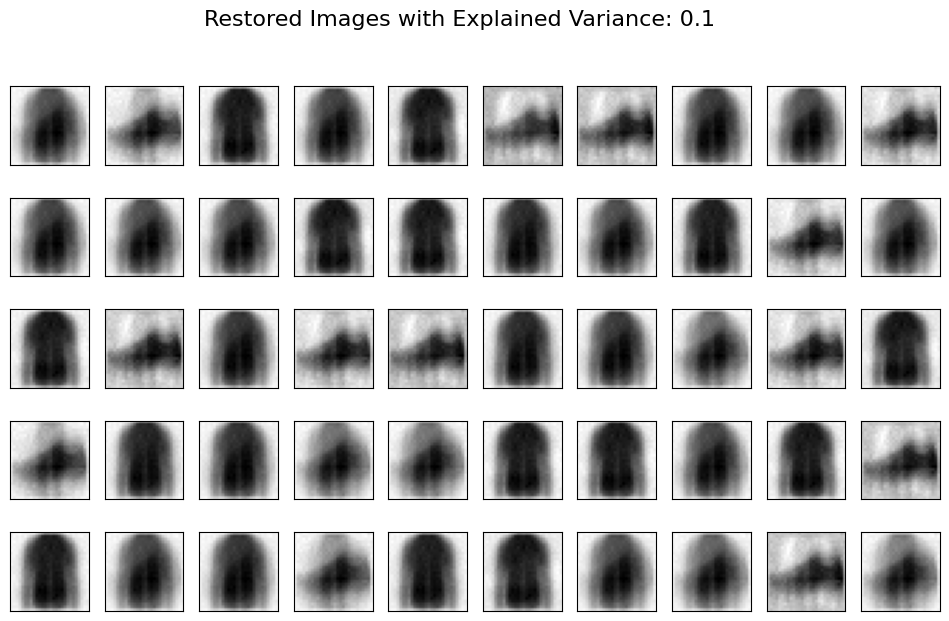

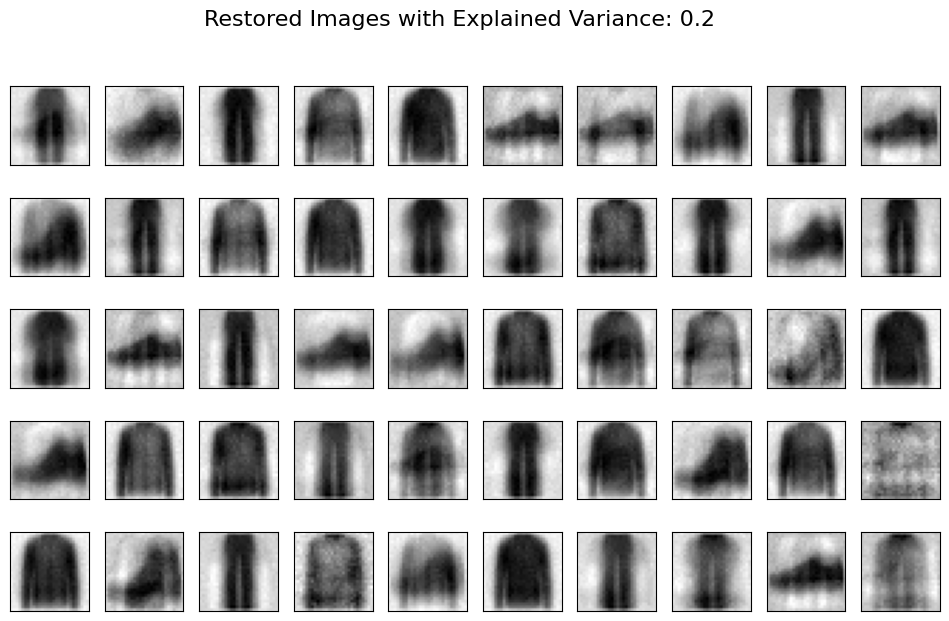

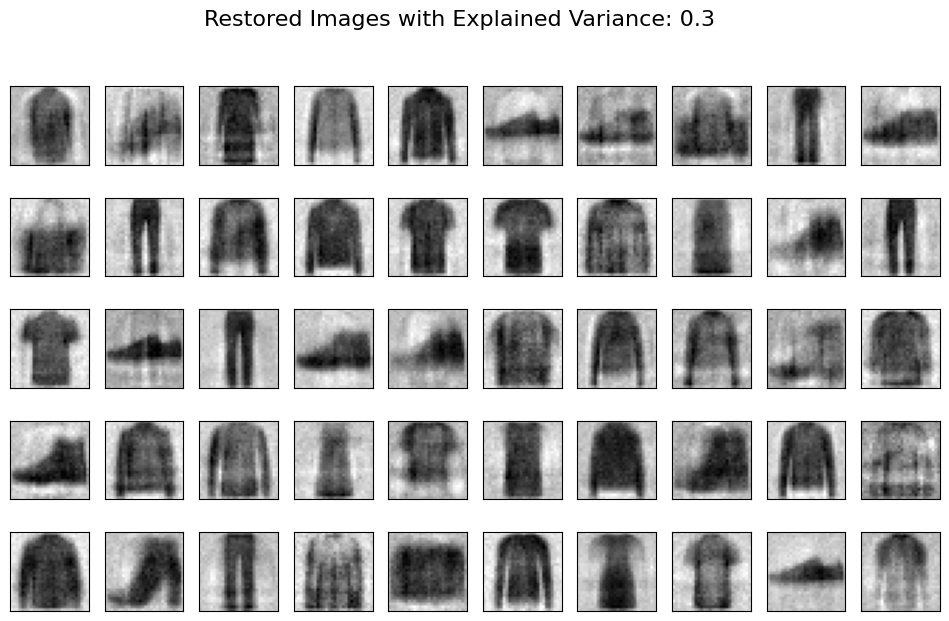

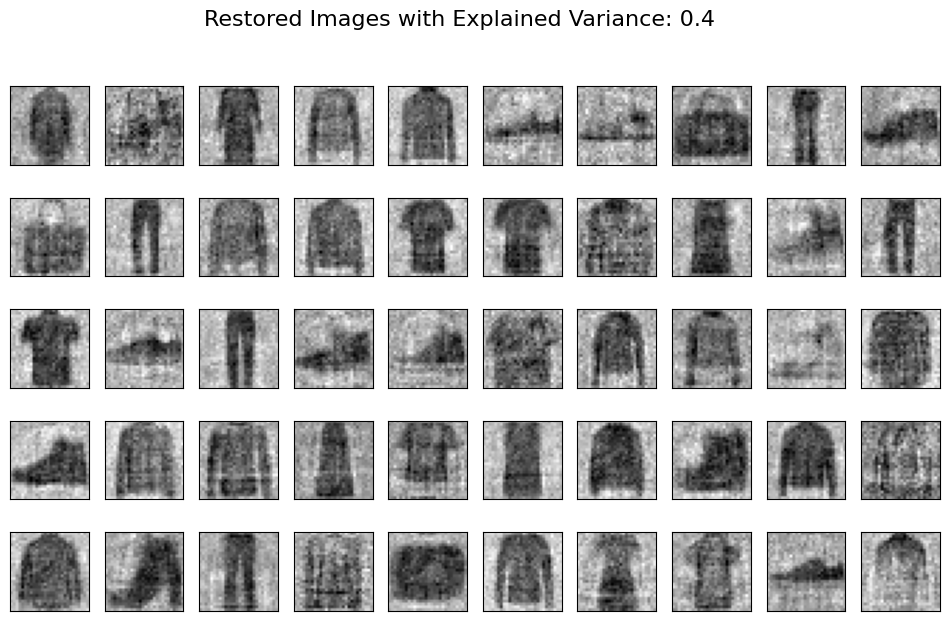

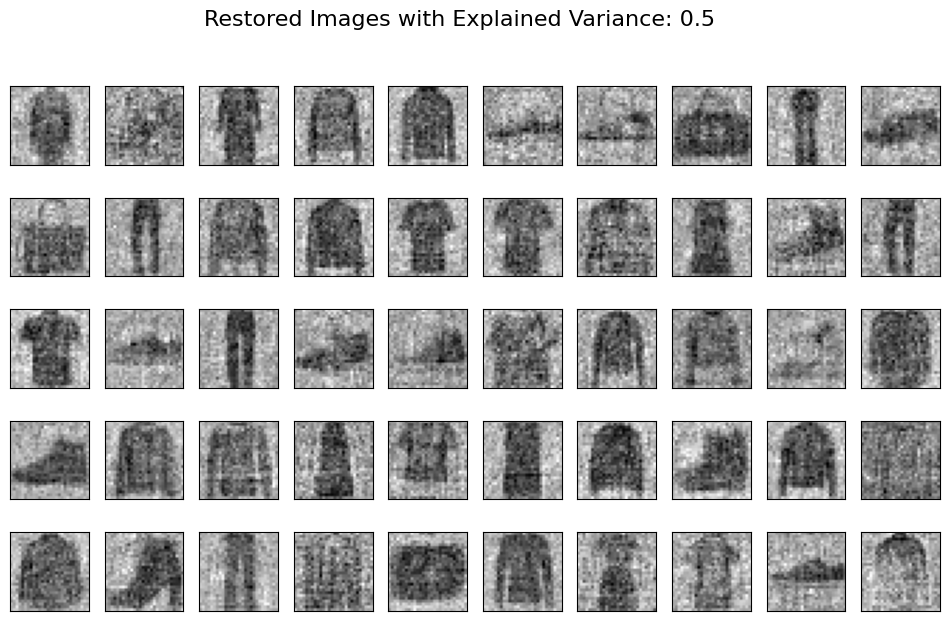

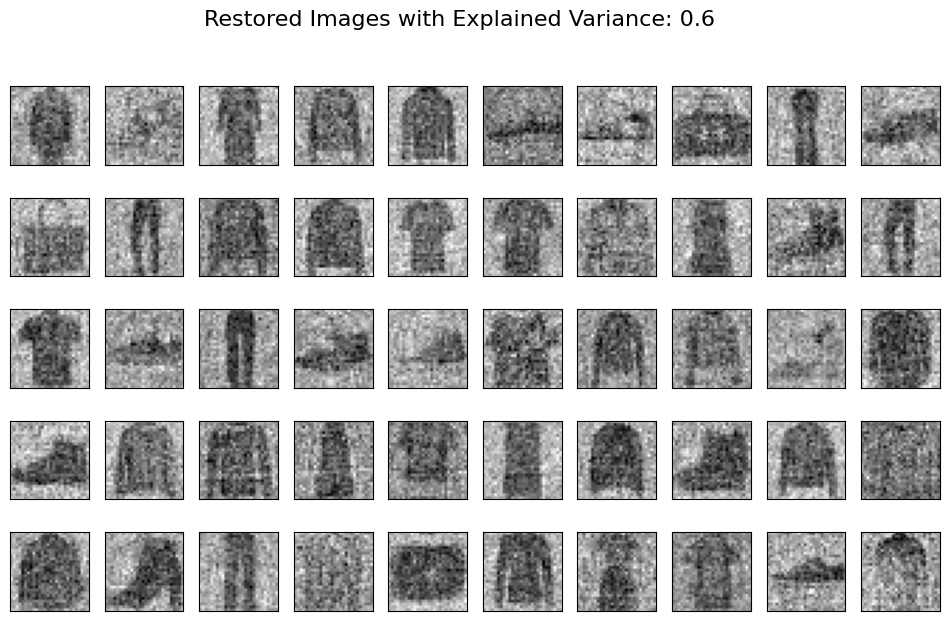

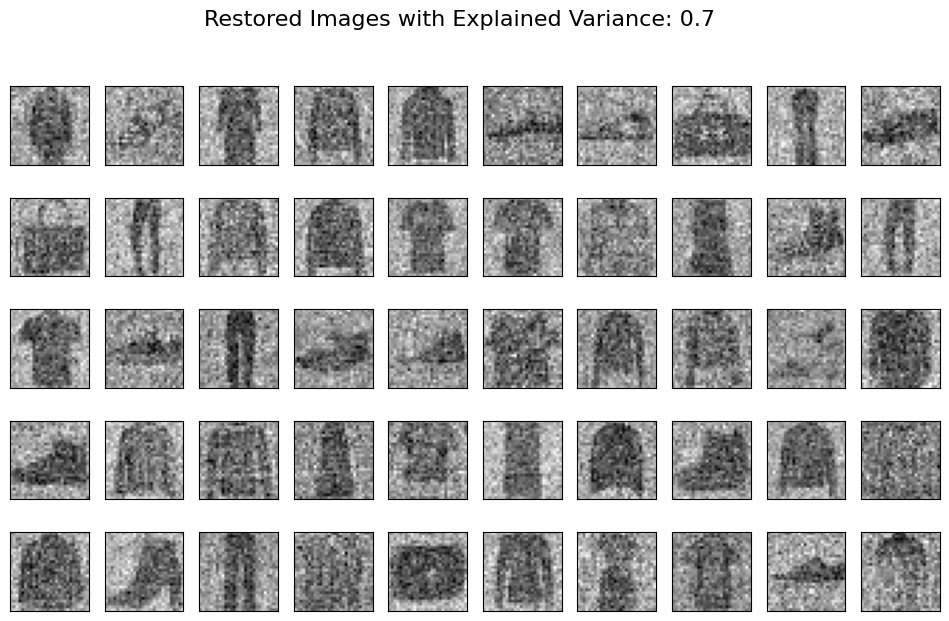

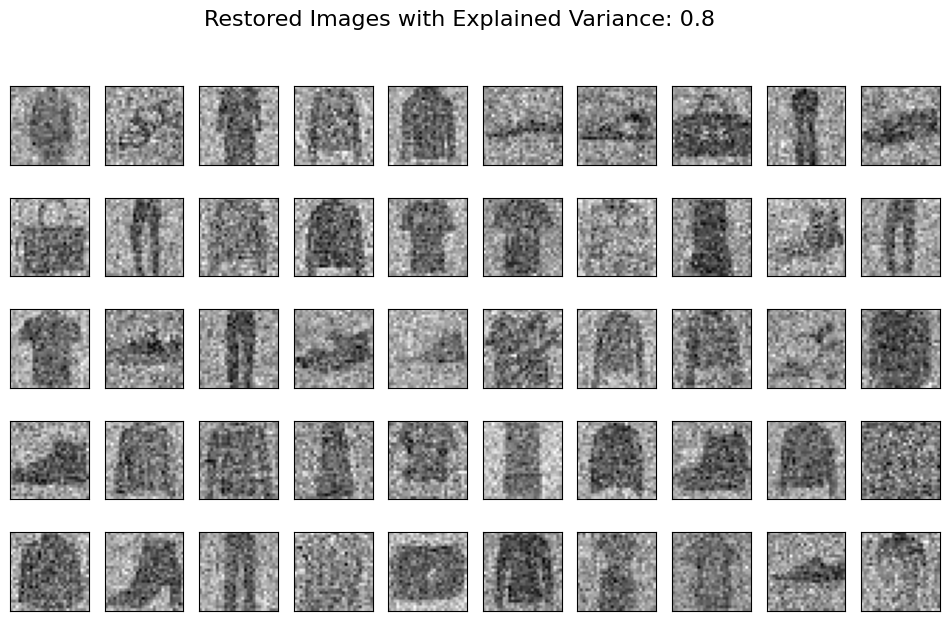

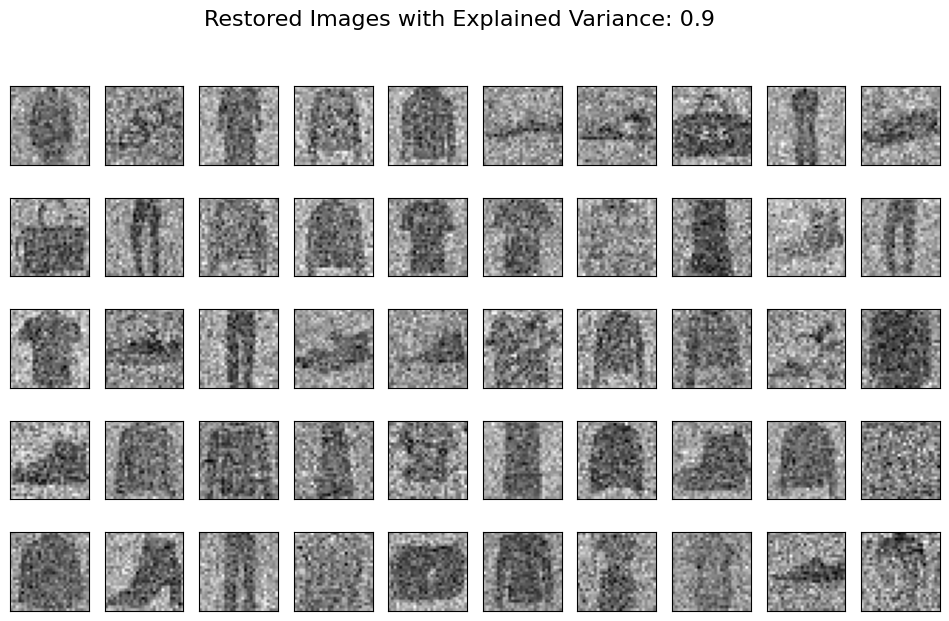

In [28]:
from sklearn.decomposition import PCA

scale = 100
X_test_noisy = np.random.normal(X_test, scale=scale)
explained_variance_values = np.arange(0.1, 1.0, 0.1)
for explained_variance in explained_variance_values:
    pca = PCA(n_components=explained_variance, svd_solver='full', random_state=42)
    pca.fit(X_test_noisy)
    X_test_reduced = pca.transform(X_test_noisy)
    restored_X_test_noisy = pca.inverse_transform(X_test_reduced)

    fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
    fig.suptitle(f'Restored Images with Explained Variance: {explained_variance:.1f}', fontsize=16)
    for i, ax in enumerate(axes.flat):
        ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:**

При низких значениях explained variance восстановленные изображения теряют много деталей и выглядят размытыми. По мере увеличения explained variance восстановленные изображения становятся более четкими, но зашумленными. Оптимальный уровень explained variance зависит от баланса между удалением шума и сохранением важных деталей изображения, в данном случае около 0.4 (визуально).

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [30]:
import pandas as pd

df = pd.DataFrame()

for scale in [50, 100, 150, 200]:
    X_test_noisy = np.random.normal(X_test, scale=scale)
    for explained_variance in explained_variance_values:
        pca = PCA(n_components=explained_variance, svd_solver='full', random_state=42)
        pca.fit(X_test_noisy)
        X_test_reduced = pca.transform(X_test_noisy)
        restored_X_test_noisy = pca.inverse_transform(X_test_reduced)

        y_pred_restored = model.predict(restored_X_test_noisy)
        f1_restored = f1_score(y_test, y_pred_restored, average='weighted')
        df = pd.concat([df, pd.DataFrame({
            'scale': [scale],
            'explained_variance': [explained_variance],
            'f1_score': [f1_restored]
        })], ignore_index=True)

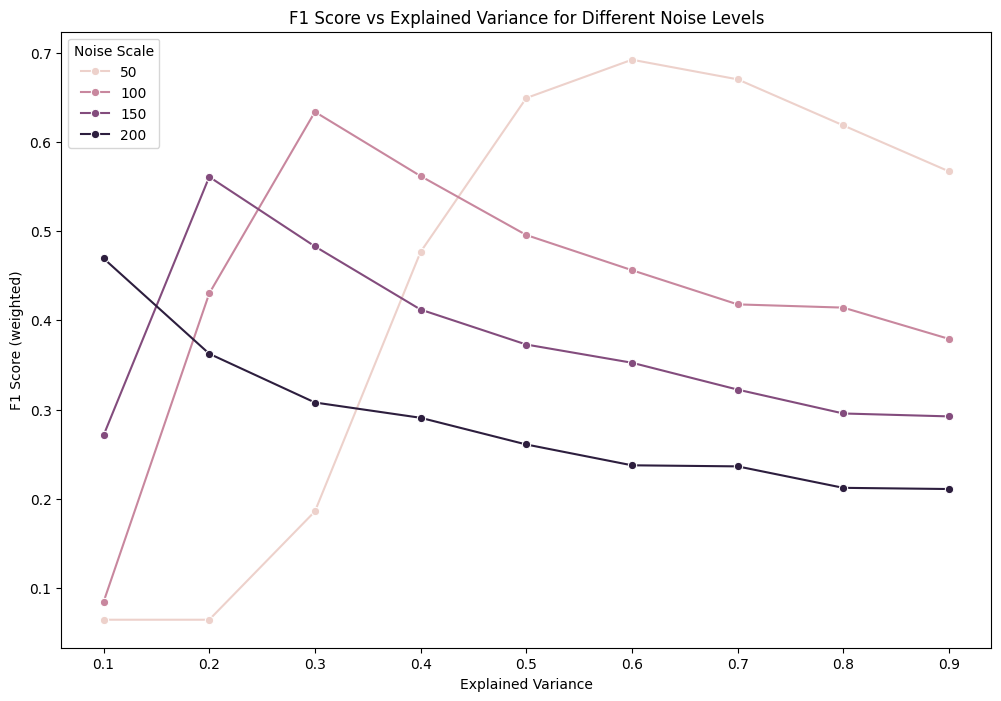

In [33]:
# Визуализация результатов
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='explained_variance', y='f1_score', hue='scale', marker='o')
plt.title('F1 Score vs Explained Variance for Different Noise Levels')
plt.xlabel('Explained Variance')
plt.ylabel('F1 Score (weighted)')
plt.legend(title='Noise Scale')
plt.show()

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

**Ваши выводы:**

1. Для каждого уровня шума есть пиковое значение explained_variance, при котором достигается максимальный F1 Score. Для scale=50 -- 0.6, для scale=100 -- 0.3, для scale=150 -- 0.2, для scale=200 -- 0.1.
2. Чем выше уровень шума, тем ниже оптимальное значение explained_variance.
2. При низких уровнях шума (scale=50) использование PCA с низким explained_variance (0.1-0.3) приводит к низким значениям F1 Score, так как важные детали изображений теряются.
3. При высоких уровнях шума (scale=200) использование PCA с высоким explained_variance (> 0.4) также приводит к низким значениям F1 Score, так как шум не удаляется эффективно.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$


## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:**

Градиент $\mathbb{KL}(P|Q)$ для SNE по $y_i$:
$$
\frac{\partial \mathbb{KL}}{\partial y_i} = 2 \sum_{j} (p_{ij} - q_{ij}) (y_i - y_j)
$$
$$
q_{ij} = \frac{\exp(-||y_i - y_j||^2)}{\sum_{k \neq l} \exp(-||y_k - y_l||^2)}
$$

Градиент $\mathbb{KL}(P|Q)$ для t-SNE по $y_i$:
$$
\frac{\partial \mathbb{KL}}{\partial y_i} = 4 \sum_{j} (p_{ij} - q_{ij}) (y_i - y_j) (1 + ||y_i - y_j||^2)^{-1}
$$
$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}
$$


## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [34]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

0          1          2          3          4          5  \
0  10.382991 -14.438544 -23.950798 -17.809813   2.480495 -15.743114   
1  18.987842 -13.071734  15.619164 -11.288528 -11.624820  14.845464   
2   7.426000  -9.236580 -21.139348   6.732592   0.447684 -20.687020   
3  10.718844 -10.240587 -20.604991   4.828083  -0.073568 -23.747055   
4  10.662165   3.871777  12.384108  -1.921321  -1.990254  -5.469310   

           6          7          8          9  
0  -9.112421 -27.390035 -11.955001  18.069910  
1  -4.924935  21.207876 -23.703025   4.440474  
2 -18.545136   7.758288  18.620790  -3.006755  
3 -17.260869   7.074364  16.996747  -6.796469  
4   2.801321 -19.978717  23.414766  -2.654889

**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [40]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.2960960997952e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.510e-14 -4.885e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

In [52]:
n, p = X.shape

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [66]:
from openTSNE import TSNE

perplexities = [2, 5, 10]
early_exaggerations = [4, 12, 24]
initializations = ['random', 'pca']
exaggeration = 1
dof = 30
results_pkg = []

for perplexity in perplexities:
    for early_exaggeration in early_exaggerations:
        for initialization in initializations:
            tsne = TSNE(
                n_components=2,
                perplexity=perplexity,
                early_exaggeration=early_exaggeration,
                initialization=initialization,
                exaggeration=exaggeration,
                dof=dof,
                random_state=42,
                n_iter=50,
            )
            Y_tsne_lib = tsne.fit(X)
            results_pkg.append((perplexity, early_exaggeration, initialization, Y_tsne_lib))
            print(f"perplexity={perplexity}, early_exaggeration={early_exaggeration}, initialization={initialization}")

perplexity=2, early_exaggeration=4, initialization=random
perplexity=2, early_exaggeration=4, initialization=pca
perplexity=2, early_exaggeration=12, initialization=random
perplexity=2, early_exaggeration=12, initialization=pca
perplexity=2, early_exaggeration=24, initialization=random
perplexity=2, early_exaggeration=24, initialization=pca
perplexity=5, early_exaggeration=4, initialization=random
perplexity=5, early_exaggeration=4, initialization=pca
perplexity=5, early_exaggeration=12, initialization=random
perplexity=5, early_exaggeration=12, initialization=pca
perplexity=5, early_exaggeration=24, initialization=random
perplexity=5, early_exaggeration=24, initialization=pca
perplexity=10, early_exaggeration=4, initialization=random
perplexity=10, early_exaggeration=4, initialization=pca
perplexity=10, early_exaggeration=12, initialization=random
perplexity=10, early_exaggeration=12, initialization=pca
perplexity=10, early_exaggeration=24, initialization=random
perplexity=10, early_e

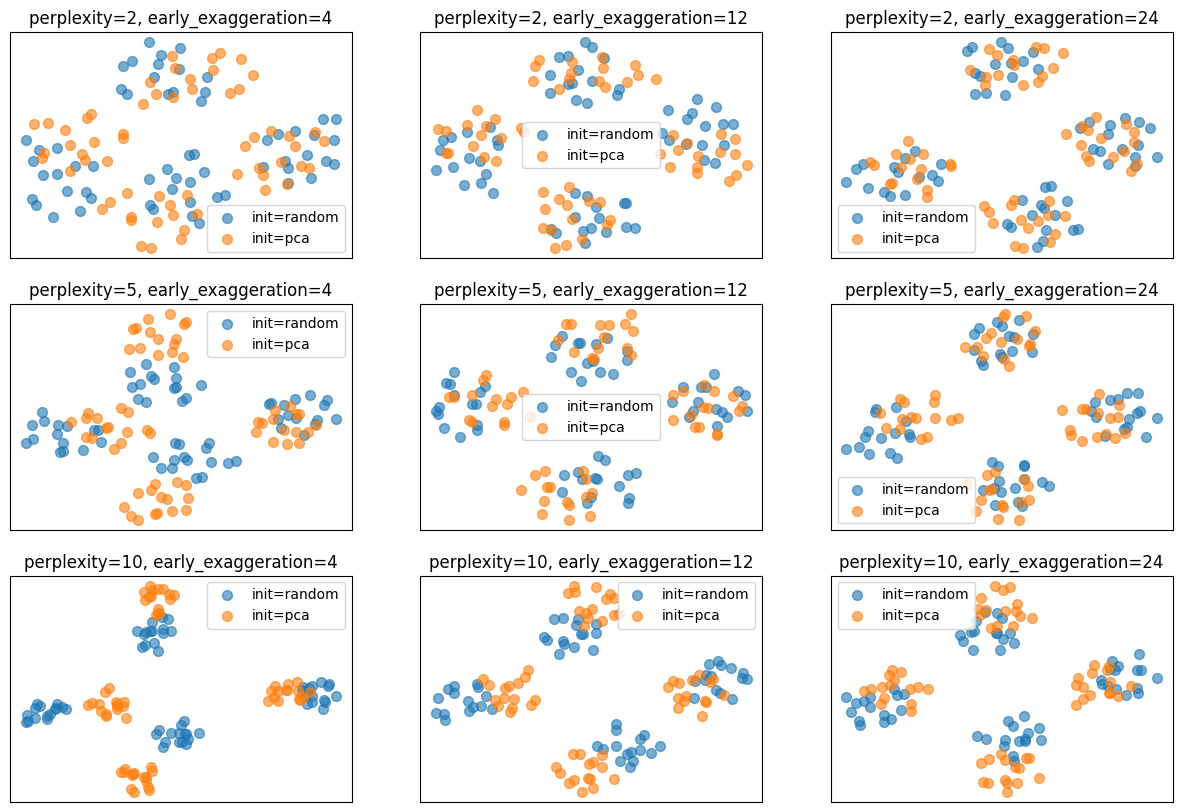

In [67]:
fig, axes = plt.subplots(len(perplexities), len(early_exaggerations), figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    for j, early_exaggeration in enumerate(early_exaggerations):
        ax = axes[i, j]
        for initialization in initializations:
            for res in results_pkg:
                if res[0] == perplexity and res[1] == early_exaggeration and res[2] == initialization:
                    Y_tsne_lib = res[3]
                    ax.scatter(Y_tsne_lib[:, 0], Y_tsne_lib[:, 1], s=50, label=f'init={initialization}', alpha=0.6)
        ax.set_title(f"perplexity={perplexity}, early_exaggeration={early_exaggeration}")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.legend()

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

In [68]:
from sklearn.datasets import load_wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
n_wine, p_wine = X_wine.shape
results_wine = []

for perplexity in perplexities:
    for early_exaggeration in early_exaggerations:
        for initialization in initializations:
            tsne = TSNE(
                n_components=2,
                perplexity=perplexity,
                early_exaggeration=early_exaggeration,
                initialization=initialization,
                exaggeration=exaggeration,
                dof=dof,
                random_state=42,
                n_iter=50,
            )
            Y_tsne_wine = tsne.fit(X_wine)
            results_wine.append((perplexity, early_exaggeration, initialization, Y_tsne_wine))
            print(f"Done: perplexity={perplexity}, early_exaggeration={early_exaggeration}, initialization={initialization}")

Done: perplexity=2, early_exaggeration=4, initialization=random
Done: perplexity=2, early_exaggeration=4, initialization=pca
Done: perplexity=2, early_exaggeration=12, initialization=random
Done: perplexity=2, early_exaggeration=12, initialization=pca
Done: perplexity=2, early_exaggeration=24, initialization=random
Done: perplexity=2, early_exaggeration=24, initialization=pca
Done: perplexity=5, early_exaggeration=4, initialization=random
Done: perplexity=5, early_exaggeration=4, initialization=pca
Done: perplexity=5, early_exaggeration=12, initialization=random
Done: perplexity=5, early_exaggeration=12, initialization=pca
Done: perplexity=5, early_exaggeration=24, initialization=random
Done: perplexity=5, early_exaggeration=24, initialization=pca
Done: perplexity=10, early_exaggeration=4, initialization=random
Done: perplexity=10, early_exaggeration=4, initialization=pca
Done: perplexity=10, early_exaggeration=12, initialization=random
Done: perplexity=10, early_exaggeration=12, initi

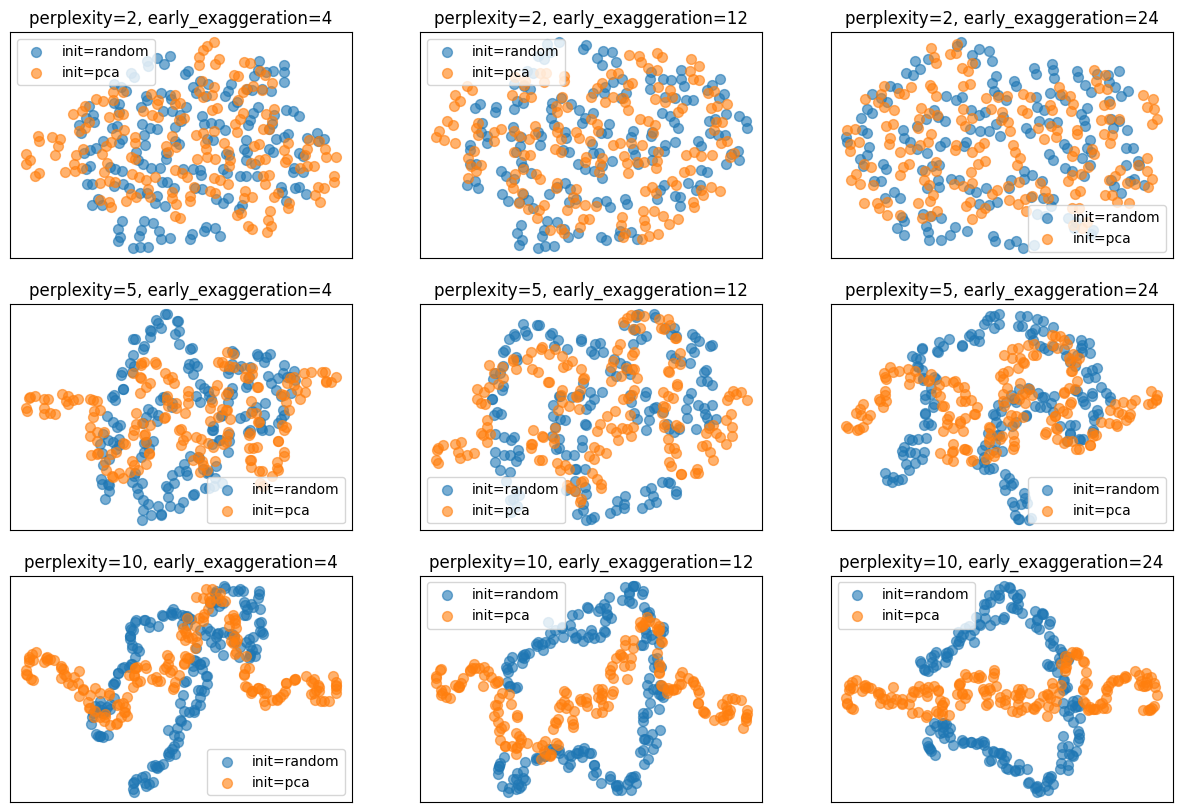

In [69]:
fig, axes = plt.subplots(len(perplexities), len(early_exaggerations), figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    for j, early_exaggeration in enumerate(early_exaggerations):
        ax = axes[i, j]
        for initialization in initializations:
            for res in results_wine:
                if res[0] == perplexity and res[1] == early_exaggeration and res[2] == initialization:
                    Y_tsne_wine = res[3]
                    ax.scatter(Y_tsne_wine[:, 0], Y_tsne_wine[:, 1], s=50, label=f'init={initialization}', alpha=0.6)
        ax.set_title(f"perplexity={perplexity}, early_exaggeration={early_exaggeration}")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.legend()